<a href="https://colab.research.google.com/github/cybervalient/DeepMD_AWV/blob/main/MalariaDataMLModelsv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import QuantileTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Datareadyformodeling.xlsx to Datareadyformodeling.xlsx


In [3]:
malaria_df=pd.read_excel("Datareadyformodeling.xlsx")
malaria_df.drop(['Unnamed: 0'],axis=1,inplace=True)
malaria_df.sample(10)

,Date,Capricorn,Greater Sekhukhune,Mopani,Vhembe,Waterberg,provincial,dis35AWRI,dis48AWRI,dis49AWRI,...,TempThabazimi,TemLEPHALALE,TempPOLOKWANE,TempTHOHOYANDOUAWS,humidityTha,humidityLe,humidityPol,humidityThou,TempHOEDSPRUIT,humidityHoe
113,2007-06-30,1,0,7,18,1,27,102.2,117.7,179.3,...,13.251389,14.023194,12.715833,16.539722,53.638889,53.846726,57.933333,62.523611,18.021944,55.302778
189,2013-10-31,1,5,60,145,3,214,79.3,121.0,188.1,...,24.668145,24.243011,18.025000,20.955511,38.904570,40.459677,56.217742,60.418011,21.626882,60.247312
30,2000-07-31,1,2,4,75,7,89,314.6,402.5,634.4,...,13.027151,13.220430,10.813844,14.884140,69.614247,65.423752,62.962366,67.581989,16.416801,62.244624
109,2007-02-28,2,1,51,158,10,222,153.8,187.7,263.9,...,26.819048,26.800893,23.645685,26.401042,54.651786,53.846726,57.900298,63.090774,26.231548,64.104167
146,2010-03-31,26,2,136,153,7,324,166.7,240.0,380.4,...,25.060081,28.460484,21.118548,22.320968,56.157258,58.364247,71.100806,78.051075,24.987769,69.758065
206,2015-03-31,32,29,541,966,19,1587,198.2,183.2,230.9,...,25.317204,26.274462,20.504704,23.569892,51.346774,54.071237,60.903226,62.271505,25.061559,60.432796
155,2010-12-31,24,2,272,506,11,815,174.7,296.1,395.8,...,25.033002,26.058712,21.184946,23.886235,57.958250,56.720351,74.650538,70.695958,24.227419,73.645161
228,2017-01-31,50,22,626,1027,64,1789,409.2,375.1,587.7,...,25.172984,26.164919,20.607392,23.192608,62.892473,63.161290,73.451613,75.990591,24.292742,68.384409
17,1999-06-30,12,1,59,122,8,202,204.3,226.8,361.5,...,14.819081,14.887222,12.508333,16.176806,63.991643,58.840278,54.512500,75.325000,17.598750,55.365278
154,2010-11-30,10,3,74,130,5,222,85.9,173.6,240.2,...,25.530417,25.680417,20.369583,22.119381,50.976389,52.994444,72.044444,75.471264,23.725417,66.302778


In [4]:
malaria_df = malaria_df.drop(['Capricorn','Greater Sekhukhune','Mopani','Waterberg','provincial'], axis = 1)
#print(type(features))

In [5]:
malaria_df.set_index('Date',inplace=True)

In [6]:
malaria_df.head()

,Vhembe,dis35AWRI,dis48AWRI,dis49AWRI,dis50AWRI,dis63AWRI,dis64AWRI,dis65AWRI,dis76AWRI,dis77AWRI,...,TempThabazimi,TemLEPHALALE,TempPOLOKWANE,TempTHOHOYANDOUAWS,humidityTha,humidityLe,humidityPol,humidityThou,TempHOEDSPRUIT,humidityHoe
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-31,244,170.2,287.1,435.1,194.6,285.0,130.4,148.2,218.7,144.2,...,22.495544,26.294070,22.814516,24.667608,54.555108,63.448043,69.983871,79.629032,25.682392,76.250000
1998-02-28,562,133.6,236.6,361.0,148.4,269.1,131.2,114.9,201.7,133.4,...,24.817992,27.082738,22.646726,24.531596,71.761506,55.558036,68.563988,76.565287,25.520833,75.751488
1998-03-31,312,114.2,201.9,324.6,129.1,219.1,139.2,117.0,185.2,159.4,...,26.623327,27.237097,22.603629,25.079704,57.652008,54.212366,65.283602,69.357527,25.661828,71.548387
1998-04-30,269,93.8,184.6,281.7,103.5,200.3,125.7,97.2,154.4,153.5,...,22.020000,23.577500,19.418889,21.465139,56.442857,54.830556,63.970833,74.320833,23.620972,70.269444
1998-05-31,101,73.5,142.5,218.8,80.9,154.6,96.2,75.6,119.6,115.9,...,16.288306,18.536559,15.745968,18.835215,48.508065,44.161290,46.747312,57.954301,21.130108,56.526882


In [7]:
def find_outliers_IQR(malaria_df):

   q1=malaria_df.quantile(0.25)

   q3=malaria_df.quantile(0.75)

   IQR=q3-q1

   outliers = malaria_df[((malaria_df<(q1-1.5*IQR)) | (malaria_df>(q3+1.5*IQR)))]

   return outliers

In [8]:
outliers=find_outliers_IQR(malaria_df)

In [9]:
outliers

,Vhembe,dis35AWRI,dis48AWRI,dis49AWRI,dis50AWRI,dis63AWRI,dis64AWRI,dis65AWRI,dis76AWRI,dis77AWRI,...,TempThabazimi,TemLEPHALALE,TempPOLOKWANE,TempTHOHOYANDOUAWS,humidityTha,humidityLe,humidityPol,humidityThou,TempHOEDSPRUIT,humidityHoe
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-30,1679.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-31,1639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def non_outliers_IQR(malaria_df):

   q1=malaria_df.quantile(0.25)

   q3=malaria_df.quantile(0.75)

   IQR=q3-q1

   non_outliers = malaria_df[~((malaria_df<(q1-1.5*IQR)) | (malaria_df>(q3+1.5*IQR)))]
      
   return non_outliers

In [11]:
malaria_df=non_outliers_IQR(malaria_df)

In [12]:
malaria_df

,Vhembe,dis35AWRI,dis48AWRI,dis49AWRI,dis50AWRI,dis63AWRI,dis64AWRI,dis65AWRI,dis76AWRI,dis77AWRI,...,TempThabazimi,TemLEPHALALE,TempPOLOKWANE,TempTHOHOYANDOUAWS,humidityTha,humidityLe,humidityPol,humidityThou,TempHOEDSPRUIT,humidityHoe
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-31,244.0,170.2,287.1,435.1,194.6,285.0,130.4,148.2,218.7,144.2,...,22.495544,26.294070,22.814516,24.667608,54.555108,63.448043,69.983871,79.629032,25.682392,76.250000
1998-02-28,562.0,133.6,236.6,361.0,148.4,269.1,131.2,114.9,201.7,133.4,...,24.817992,27.082738,22.646726,24.531596,71.761506,55.558036,68.563988,76.565287,25.520833,75.751488
1998-03-31,312.0,114.2,201.9,324.6,129.1,219.1,139.2,117.0,185.2,159.4,...,26.623327,27.237097,22.603629,25.079704,57.652008,54.212366,65.283602,69.357527,25.661828,71.548387
1998-04-30,269.0,93.8,184.6,281.7,103.5,200.3,125.7,97.2,154.4,153.5,...,22.020000,23.577500,19.418889,21.465139,56.442857,54.830556,63.970833,74.320833,23.620972,70.269444
1998-05-31,101.0,73.5,142.5,218.8,80.9,154.6,96.2,75.6,119.6,115.9,...,16.288306,18.536559,15.745968,18.835215,48.508065,44.161290,46.747312,57.954301,21.130108,56.526882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,539.0,129.1,137.3,204.6,64.8,105.4,68.4,78.0,105.2,72.5,...,17.322531,17.863306,14.870699,18.614785,40.653686,40.951613,51.869624,53.456989,19.002823,48.299731
2017-09-30,NaN,108.5,107.7,168.9,48.4,98.0,51.4,58.3,84.5,54.7,...,23.188056,22.431111,18.899444,20.807244,33.793056,37.018056,49.829167,57.401060,21.191250,58.233333
2017-10-31,NaN,127.0,135.3,173.9,70.3,148.5,81.3,84.4,117.7,69.5,...,24.371237,23.943683,19.787231,22.856164,40.356183,41.311828,55.771505,57.849315,20.730780,65.836022


In [13]:
# Find the mean excluding NaN values using DataFrame.mean()
#df2 = df.mean(axis = 0, skipna = True)
#Exclude NA/null values when computing the result.
#malaria_df=malaria_df.dropna()
malaria_df = malaria_df.fillna(malaria_df.mean(axis = 0, skipna = True))

In [14]:
malaria_df

,Vhembe,dis35AWRI,dis48AWRI,dis49AWRI,dis50AWRI,dis63AWRI,dis64AWRI,dis65AWRI,dis76AWRI,dis77AWRI,...,TempThabazimi,TemLEPHALALE,TempPOLOKWANE,TempTHOHOYANDOUAWS,humidityTha,humidityLe,humidityPol,humidityThou,TempHOEDSPRUIT,humidityHoe
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-31,244.000000,170.2,287.1,435.1,194.6,285.0,130.4,148.2,218.7,144.2,...,22.495544,26.294070,22.814516,24.667608,54.555108,63.448043,69.983871,79.629032,25.682392,76.250000
1998-02-28,562.000000,133.6,236.6,361.0,148.4,269.1,131.2,114.9,201.7,133.4,...,24.817992,27.082738,22.646726,24.531596,71.761506,55.558036,68.563988,76.565287,25.520833,75.751488
1998-03-31,312.000000,114.2,201.9,324.6,129.1,219.1,139.2,117.0,185.2,159.4,...,26.623327,27.237097,22.603629,25.079704,57.652008,54.212366,65.283602,69.357527,25.661828,71.548387
1998-04-30,269.000000,93.8,184.6,281.7,103.5,200.3,125.7,97.2,154.4,153.5,...,22.020000,23.577500,19.418889,21.465139,56.442857,54.830556,63.970833,74.320833,23.620972,70.269444
1998-05-31,101.000000,73.5,142.5,218.8,80.9,154.6,96.2,75.6,119.6,115.9,...,16.288306,18.536559,15.745968,18.835215,48.508065,44.161290,46.747312,57.954301,21.130108,56.526882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,539.000000,129.1,137.3,204.6,64.8,105.4,68.4,78.0,105.2,72.5,...,17.322531,17.863306,14.870699,18.614785,40.653686,40.951613,51.869624,53.456989,19.002823,48.299731
2017-09-30,204.599099,108.5,107.7,168.9,48.4,98.0,51.4,58.3,84.5,54.7,...,23.188056,22.431111,18.899444,20.807244,33.793056,37.018056,49.829167,57.401060,21.191250,58.233333
2017-10-31,204.599099,127.0,135.3,173.9,70.3,148.5,81.3,84.4,117.7,69.5,...,24.371237,23.943683,19.787231,22.856164,40.356183,41.311828,55.771505,57.849315,20.730780,65.836022


In [15]:
X=malaria_df.drop(['Vhembe'], axis = 1)
X

,dis35AWRI,dis48AWRI,dis49AWRI,dis50AWRI,dis63AWRI,dis64AWRI,dis65AWRI,dis76AWRI,dis77AWRI,dis86AWRI,...,TempThabazimi,TemLEPHALALE,TempPOLOKWANE,TempTHOHOYANDOUAWS,humidityTha,humidityLe,humidityPol,humidityThou,TempHOEDSPRUIT,humidityHoe
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-31,170.2,287.1,435.1,194.6,285.0,130.4,148.2,218.7,144.2,292.4,...,22.495544,26.294070,22.814516,24.667608,54.555108,63.448043,69.983871,79.629032,25.682392,76.250000
1998-02-28,133.6,236.6,361.0,148.4,269.1,131.2,114.9,201.7,133.4,257.8,...,24.817992,27.082738,22.646726,24.531596,71.761506,55.558036,68.563988,76.565287,25.520833,75.751488
1998-03-31,114.2,201.9,324.6,129.1,219.1,139.2,117.0,185.2,159.4,237.7,...,26.623327,27.237097,22.603629,25.079704,57.652008,54.212366,65.283602,69.357527,25.661828,71.548387
1998-04-30,93.8,184.6,281.7,103.5,200.3,125.7,97.2,154.4,153.5,186.0,...,22.020000,23.577500,19.418889,21.465139,56.442857,54.830556,63.970833,74.320833,23.620972,70.269444
1998-05-31,73.5,142.5,218.8,80.9,154.6,96.2,75.6,119.6,115.9,145.2,...,16.288306,18.536559,15.745968,18.835215,48.508065,44.161290,46.747312,57.954301,21.130108,56.526882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,129.1,137.3,204.6,64.8,105.4,68.4,78.0,105.2,72.5,122.7,...,17.322531,17.863306,14.870699,18.614785,40.653686,40.951613,51.869624,53.456989,19.002823,48.299731
2017-09-30,108.5,107.7,168.9,48.4,98.0,51.4,58.3,84.5,54.7,96.7,...,23.188056,22.431111,18.899444,20.807244,33.793056,37.018056,49.829167,57.401060,21.191250,58.233333
2017-10-31,127.0,135.3,173.9,70.3,148.5,81.3,84.4,117.7,69.5,144.9,...,24.371237,23.943683,19.787231,22.856164,40.356183,41.311828,55.771505,57.849315,20.730780,65.836022


In [16]:
Y=malaria_df['Vhembe']
Y

Date
1998-01-31    244.000000
1998-02-28    562.000000
1998-03-31    312.000000
1998-04-30    269.000000
1998-05-31    101.000000
                 ...    
2017-08-31    539.000000
2017-09-30    204.599099
2017-10-31    204.599099
2017-11-30    361.000000
2017-12-31    204.599099
Name: Vhembe, Length: 240, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [18]:
corr1=X_train.corr(method = 'pearson')

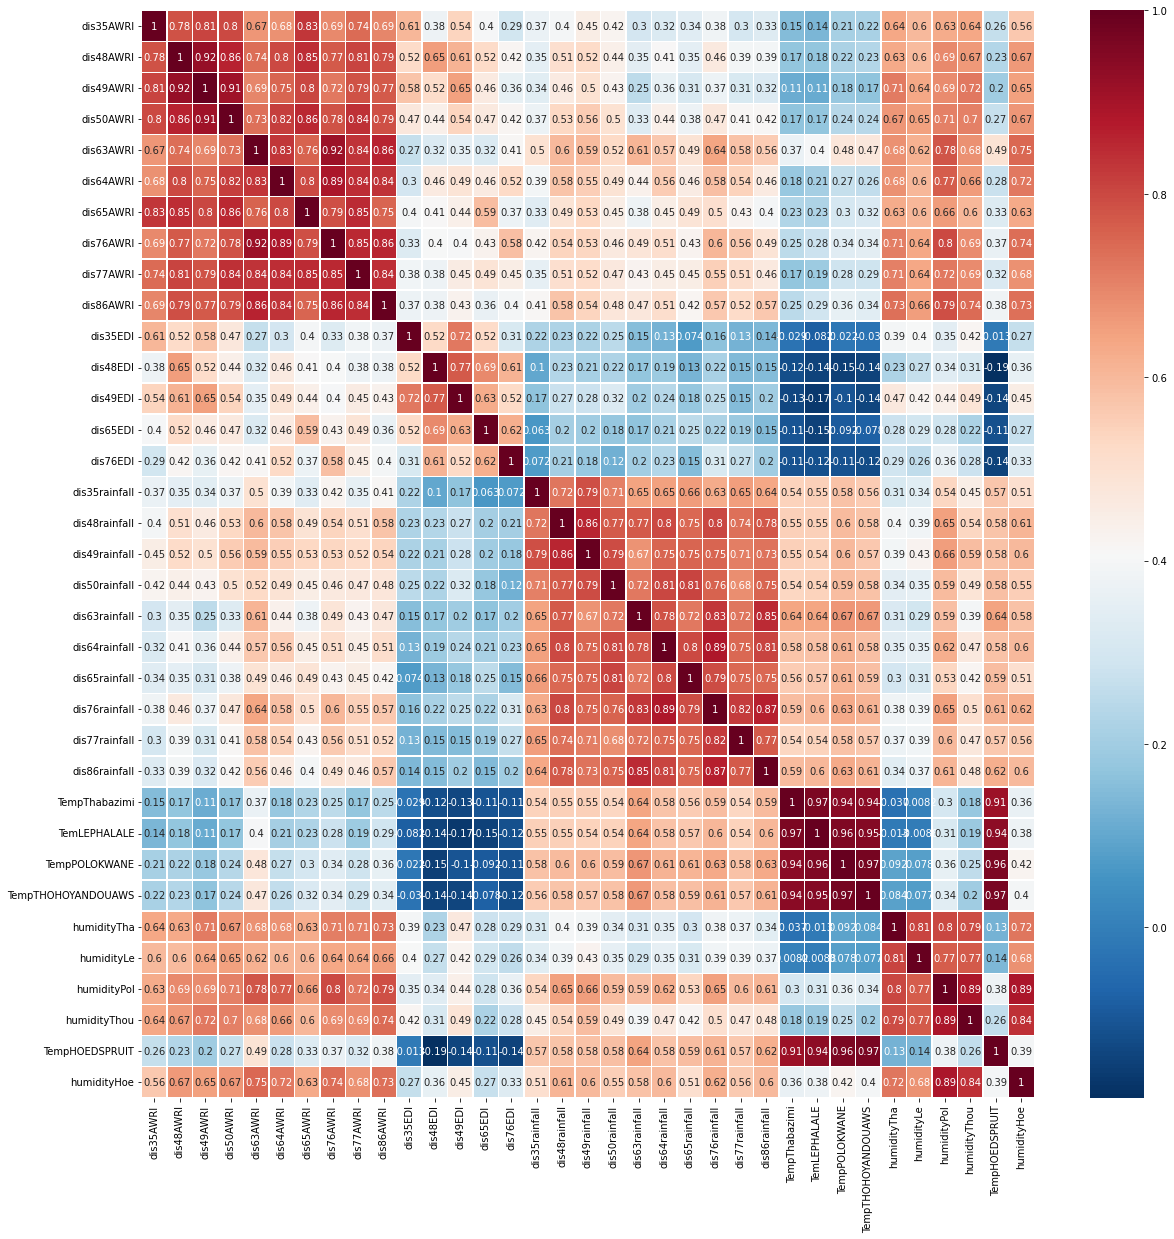

In [19]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches

sns.heatmap(corr1,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [20]:
def correlation(dataset, threshold):
    column_corr=set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
     for j in range(i):
        if (corr_matrix.iloc[i,j])>threshold:
            colname=corr_matrix.columns[i]
            column_corr.add(colname)
    return column_corr

In [21]:
highly_corr_features= correlation(X_train, 0.95)
len(set(highly_corr_features))

4

In [22]:
highly_corr_features=list(highly_corr_features)

In [23]:
highly_corr_features

['TempHOEDSPRUIT', 'TempPOLOKWANE', 'TempTHOHOYANDOUAWS', 'TemLEPHALALE']

In [24]:
malaria_df = malaria_df.drop(highly_corr_features, axis = 1)

In [25]:
malaria_df.shape

(240, 32)

In [26]:
features=malaria_df.drop(['Vhembe'], axis = 1)
features

,dis35AWRI,dis48AWRI,dis49AWRI,dis50AWRI,dis63AWRI,dis64AWRI,dis65AWRI,dis76AWRI,dis77AWRI,dis86AWRI,...,dis65rainfall,dis76rainfall,dis77rainfall,dis86rainfall,TempThabazimi,humidityTha,humidityLe,humidityPol,humidityThou,humidityHoe
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-31,170.2,287.1,435.1,194.6,285.0,130.4,148.2,218.7,144.2,292.4,...,69.9,74.2,46.7,122.7,22.495544,54.555108,63.448043,69.983871,79.629032,76.250000
1998-02-28,133.6,236.6,361.0,148.4,269.1,131.2,114.9,201.7,133.4,257.8,...,9.1,41.6,28.7,47.6,24.817992,71.761506,55.558036,68.563988,76.565287,75.751488
1998-03-31,114.2,201.9,324.6,129.1,219.1,139.2,117.0,185.2,159.4,237.7,...,30.8,34.2,60.1,46.5,26.623327,57.652008,54.212366,65.283602,69.357527,71.548387
1998-04-30,93.8,184.6,281.7,103.5,200.3,125.7,97.2,154.4,153.5,186.0,...,8.2,13.0,35.0,5.0,22.020000,56.442857,54.830556,63.970833,74.320833,70.269444
1998-05-31,73.5,142.5,218.8,80.9,154.6,96.2,75.6,119.6,115.9,145.2,...,0.0,0.0,0.0,0.0,16.288306,48.508065,44.161290,46.747312,57.954301,56.526882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,129.1,137.3,204.6,64.8,105.4,68.4,78.0,105.2,72.5,122.7,...,0.4,0.0,0.0,0.4,17.322531,40.653686,40.951613,51.869624,53.456989,48.299731
2017-09-30,108.5,107.7,168.9,48.4,98.0,51.4,58.3,84.5,54.7,96.7,...,0.0,5.6,0.0,3.9,23.188056,33.793056,37.018056,49.829167,57.401060,58.233333
2017-10-31,127.0,135.3,173.9,70.3,148.5,81.3,84.4,117.7,69.5,144.9,...,43.4,57.9,30.2,75.3,24.371237,40.356183,41.311828,55.771505,57.849315,65.836022


In [27]:
target=malaria_df['Vhembe']
target

Date
1998-01-31    244.000000
1998-02-28    562.000000
1998-03-31    312.000000
1998-04-30    269.000000
1998-05-31    101.000000
                 ...    
2017-08-31    539.000000
2017-09-30    204.599099
2017-10-31    204.599099
2017-11-30    361.000000
2017-12-31    204.599099
Name: Vhembe, Length: 240, dtype: float64

In [28]:
def mutual_info_regressions_scores(kvalue,target=malaria_df['Vhembe']):
         
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import mutual_info_regression
           
    select_univariate = SelectKBest(mutual_info_regression, k=kvalue).fit(features, target)
    feature_mask = select_univariate.get_support()

    features.columns[feature_mask]
         
    mutual_info_coef = pd.DataFrame({'FeatureName': features.columns, 
                   'Score': select_univariate.scores_}).sort_values(by='Score', 
                                                                   ascending=False).head(kvalue) 
    return mutual_info_coef

In [29]:
mutual_info_regressions_scores(5)

,FeatureName,Score
22,dis76rainfall,0.276839
0,dis35AWRI,0.245610
16,dis48rainfall,0.241909
24,dis86rainfall,0.238701
23,dis77rainfall,0.230568


In [30]:
def f_regression_scores(kvalue,target=malaria_df['Vhembe']):
         
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression
    
    select_univariate = SelectKBest(f_regression, k=kvalue).fit(features, target)
    feature_mask = select_univariate.get_support()

    feature_mask
    features.columns[feature_mask]
    select_univariate.scores_
    f_regression_coef= pd.DataFrame({'FeatureName': features.columns, 
                  'Score': select_univariate.scores_}).sort_values(by='Score', 
                                                                   ascending=False).head(kvalue)
    
    return f_regression_coef

In [31]:
f_regression_scores(5)

,FeatureName,Score
4,dis63AWRI,73.527596
30,humidityHoe,73.346131
9,dis86AWRI,68.917276
28,humidityPol,68.286905
2,dis49AWRI,67.590228


In [32]:
def lasso_coef_scores(kvalue,target=malaria_df['Vhembe']):
      
    from sklearn.linear_model import  Lasso
    warnings.filterwarnings('ignore')

    lasso = Lasso(alpha=1.0)

    lasso.fit(features, target)

    lasso_coef = pd.DataFrame({'Feature': features.columns, 
                               'LassoCoef': lasso.coef_}).sort_values(by = 'LassoCoef',
                                                                      ascending =False).head(kvalue)

   
    return lasso_coef

In [33]:
#from sklearn.feature_selection import mutual_info_regression
lasso_coef_scores(5)  #30,10,27


,Feature,LassoCoef
10,dis35EDI,61.019877
11,dis48EDI,39.950993
12,dis49EDI,17.015088
25,TempThabazimi,14.388892
30,humidityHoe,2.677110


In [34]:
def select_columns(kvalue,target=malaria_df['Vhembe']):
    
    #Code to get the K best Features using mutual information   
    from sklearn.feature_selection import SelectKBest

    from sklearn.feature_selection import mutual_info_regression
    from sklearn.linear_model import LinearRegression
    from sklearn.feature_selection import f_regression

    
        
    select_univariate = SelectKBest(mutual_info_regression, k=kvalue).fit(features, target)
    feature_mask = select_univariate.get_support()

    features.columns[feature_mask]

        #Kbest_features=  features.columns[feature_mask]
        #regression_analysis_scores  - select_univariate.scores_   
    mutual_info_coef = pd.DataFrame({'FeatureName': features.columns, 
                   'Score': select_univariate.scores_}).sort_values(by='Score', 
                                                                    ascending=False) 

    mutual_info_df = mutual_info_coef.sort_values(by='Score', ascending=False).head(kvalue) 

    mutual_info_df = pd.DataFrame({'Mutual Information Method': mutual_info_df['FeatureName'].values}) 

    ##############################Code below for F regression Method####################
    
    select_univariate = SelectKBest(f_regression, k=kvalue).fit(features, target)
    feature_mask = select_univariate.get_support()

    feature_mask
    features.columns[feature_mask]
    select_univariate.scores_
    f_regression_coef= pd.DataFrame({'FeatureName': features.columns, 
                  'Score': select_univariate.scores_}).sort_values(by='Score', 
                                                                   ascending=False)
    f_regression_df = f_regression_coef.sort_values(by='Score', ascending=False).head(kvalue)
    f_regression_df = pd.DataFrame({'F Regresion Method': f_regression_df['FeatureName'].values})
    
  

    from sklearn.linear_model import  Lasso
    warnings.filterwarnings('ignore')

    lasso = Lasso(alpha=1.0)

    lasso.fit(features, target)

    lasso_coef = pd.DataFrame({'Feature': features.columns, 
                               'LassoCoef': lasso.coef_}).sort_values(by = 'LassoCoef',
                                                                      ascending =False)

    lasso_coef['LassoCoef'] = abs(lasso_coef['LassoCoef'])


    lasso_df = lasso_coef.sort_values(by='LassoCoef', ascending=False).head(kvalue)

    lasso_df = pd.DataFrame({'Lasso Method': lasso_df['Feature'].values})

    comp_selected_col_df = [lasso_df,
                            f_regression_df,
                            mutual_info_df]
    final_selected_col_df = pd.concat(comp_selected_col_df, axis=1)
    
    return final_selected_col_df

In [35]:
final_selected_col_df = select_columns(23)  #30,10,27
final_selected_col_df

,Lasso Method,F Regresion Method,Mutual Information Method
0,dis35EDI,dis63AWRI,dis76rainfall
1,dis76EDI,humidityHoe,dis35AWRI
2,dis48EDI,dis86AWRI,dis86rainfall
3,dis49EDI,humidityPol,dis48rainfall
4,TempThabazimi,dis49AWRI,dis77rainfall
5,dis65EDI,dis48AWRI,dis63AWRI
6,humidityThou,humidityThou,dis64rainfall
7,humidityHoe,dis76AWRI,dis35rainfall
8,humidityPol,TempThabazimi,TempThabazimi
9,humidityLe,dis48rainfall,dis65rainfall


In [36]:
selectiontech = list(final_selected_col_df.columns)

In [37]:
selectiontech

['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

In [38]:
list(malaria_df[final_selected_col_df['Lasso Method'].values].columns)

['dis35EDI',
 'dis76EDI',
 'dis48EDI',
 'dis49EDI',
 'TempThabazimi',
 'dis65EDI',
 'humidityThou',
 'humidityHoe',
 'humidityPol',
 'humidityLe',
 'dis35AWRI',
 'dis63AWRI',
 'dis65rainfall',
 'dis48rainfall',
 'dis63rainfall',
 'dis64rainfall',
 'dis49AWRI',
 'dis77rainfall',
 'dis50AWRI',
 'dis50rainfall',
 'dis76AWRI',
 'dis35rainfall',
 'dis86AWRI']

In [39]:
malaria_df[final_selected_col_df['Lasso Method'].values]

,dis35EDI,dis76EDI,dis48EDI,dis49EDI,TempThabazimi,dis65EDI,humidityThou,humidityHoe,humidityPol,humidityLe,...,dis48rainfall,dis63rainfall,dis64rainfall,dis49AWRI,dis77rainfall,dis50AWRI,dis50rainfall,dis76AWRI,dis35rainfall,dis86AWRI
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-31,-0.80,-0.62,-0.24,0.21,22.495544,-0.50,79.629032,76.250000,69.983871,63.448043,...,125.7,71.1,33.5,435.1,46.7,194.6,110.5,218.7,89.0,292.4
1998-02-28,-1.19,-0.89,-0.66,-0.57,24.817992,-0.94,76.565287,75.751488,68.563988,55.558036,...,30.4,56.9,35.4,361.0,28.7,148.4,11.5,201.7,11.9,257.8
1998-03-31,-1.33,-1.27,-0.97,-0.74,26.623327,-0.91,69.357527,71.548387,65.283602,54.212366,...,24.0,16.3,41.4,324.6,60.1,129.1,17.9,185.2,13.3,237.7
1998-04-30,-1.45,-1.48,-0.99,-0.79,22.020000,-1.09,74.320833,70.269444,63.970833,54.830556,...,28.3,30.1,21.0,281.7,35.0,103.5,3.9,154.4,5.3,186.0
1998-05-31,-1.49,-1.51,-1.03,-0.87,16.288306,-1.15,57.954301,56.526882,46.747312,44.161290,...,0.0,0.1,0.0,218.8,0.0,80.9,0.0,119.6,0.0,145.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,0.91,0.40,0.13,0.22,17.322531,0.46,53.456989,48.299731,51.869624,40.951613,...,3.6,1.0,0.0,204.6,0.0,64.8,0.0,105.2,11.1,122.7
2017-09-30,0.45,-0.20,-0.27,-0.08,23.188056,-0.15,57.401060,58.233333,49.829167,37.018056,...,4.2,19.7,0.0,168.9,0.0,48.4,0.0,84.5,12.2,96.7
2017-10-31,0.58,0.35,-0.07,-0.20,24.371237,0.42,57.849315,65.836022,55.771505,41.311828,...,57.5,80.3,44.6,173.9,30.2,70.3,36.5,117.7,49.7,144.9


In [40]:
#Dictionary to hold the training and the test scores from the different Models  that we build and train
#The keys wil be the meaningfull names for the different models that we build and te values will be Training and Test R2s
#We can use the dictionary to compare different models
result_dict = {}

In [41]:
#Helper function build_model that will build and train the different  Models 

#Input Arguments

    #1. regression_fn - It takes the trainning data and the corresponding target values It instantiates a particular model e.g DicisionTree,MLP
    #2. name_of_y_col - specifies the column names for the target values we should use for Training.
    #3. names_of_x_cols - is a list of Feature columns
    #4. dataset - original dataframe with the features and our Target Values
    #5. test_frac - How much of our data we should hold out to evaluate or measure our model.the Fraction of our data that will be used as test data
    #6. preprocess_fn - if you want the data to be preprocesed i.e standardized or scaled by default its set to None
    #7. show_plot_Y - To display a plot of Actual vs Predicted set to True
    #8. show_plot_scatter - If you want to see how you Regression Line fits on the Training data - set it to True

def build_model(regression_fn,                
                name_of_y_col, 
                names_of_x_cols,
                NKbest,
                FS_Technique,
                dataset,
                GridSearch=False,
                test_frac=0.3,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False
                     ):

    #Extact from the dataset the features that you want to train your Models to variable X
    X = dataset[names_of_x_cols]
    #Extract the target value into Y
    Y = dataset[name_of_y_col]
    
    #call the function to apply scaling
    if preprocess_fn is not None:
        X = preprocess_fn(X)
        
    #Split dataset into Training and Test data    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    #Pass the Training data  and the corresponding Lables to the Regression Function
    #The Function will return a fully trained ML Model which you can use for prediction and store the predicted values in y_pred
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)

    #Print the R2 values on the Training data as well as the test data for the model 
    print("Training_score : " , model.score(x_train, y_train))
    print("Test_score : " , model.score(x_test, y_test))
    print("r_score : ", r2_score(y_test, y_pred))
    print("mean_squared_error : ", mean_squared_error(y_test, y_pred))
    print("Number of features Selected : ", NKbest)
    print("Feature Selection Technique : ", FS_Technique)
    
    best_params={}    
    if GridSearch == True:
        best_params=model.best_params_
    # If you Invoke the build model with function show_plot_Y == True : Plot the Actual values vs Predicted values in the form of a line chart
    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)

        plt.legend()
        plt.show()
        
    #To display a scatter plot on matplotlib , NB: This works if you only used a single feature for training
    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend(['Predicted line','Observed data'])
        plt.show()
    
    #From this Function we return the Training score and test R2 score for this particular Model
    
    return {
            'training_score': model.score(x_train, y_train),
            'Test_score' :   model.score(x_test, y_test),   
            'r_score': r2_score(y_test, y_pred),
            'mean_squared_error ':  mean_squared_error(y_test, y_pred),
            'Selection Technique' : FS_Technique,
            'Best Params' : best_params
                    
           }    

In [42]:
#Function to scale the data  using standered scaler
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)  

    return scaler.transform(x)

In [43]:
#apply_standard_scaler(x)

In [43]:
#This function quickly print out the Training and test score for all the Models that we build so far
#The code will read the resuts stored in the dictionary (result_dict)
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Selection Technique: ', FS_Technique)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['Test_score'])
        print('r_score', result_dict[key]['r_score'])
        print('mean_squared_error ', result_dict[key]['mean_squared_error '])
        print('Best params ', result_dict[key]['Best Params'])
        print()

In [44]:
#result_dict = {}
compare_results()

In [ ]:
# key_list = list(result_dict.values())
# print(key_list)

In [45]:
#Function to test DecisionTreeRegressor algorith without GridSearch
def tree_reg(x_train, y_train):    
    model = DecisionTreeRegressor()
    #model = DecisionTreeRegressor(max_depth=2, random_state=42) 
    model.fit(x_train, y_train)
    
    return model

In [46]:
#Function to train the Model using DecisionTreeRegressor and using Gridsearch and cross validation to get the parameters
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
#Verbose is just the info you want to be printed when your Gridsearch is runnin5

def tree_regGcv(x_train, y_train):
    params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
                  
    model = GridSearchCV(DecisionTreeRegressor(random_state=42),params,verbose=1, cv=3)
    model.fit(x_train, y_train)
    
    return   model 

# def tree_regGcv(x_train, y_train):
#     params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
#     grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), params, verbose=1, cv=3)

#     grid_search_cv.fit(x_train, y_train)
    
        
#     model = DecisionTreeRegressor(max_leaf_nodes=grid_search_cv.best_params_['max_leaf_nodes'],
#                                   min_samples_split=grid_search_cv.best_params_['min_samples_split'],
#                                   random_state=42)
#     model.fit(x_train, y_train)
    
#     return   model


Fitting 3 folds for each of 294 candidates, totalling 882 fits
Training_score :  0.4597259756925447
Test_score :  0.12049368296020369
r_score :  0.12049368296020369
mean_squared_error :  25611.52367256173
Number of features Selected :  27
Feature Selection Technique :  F Regresion Method


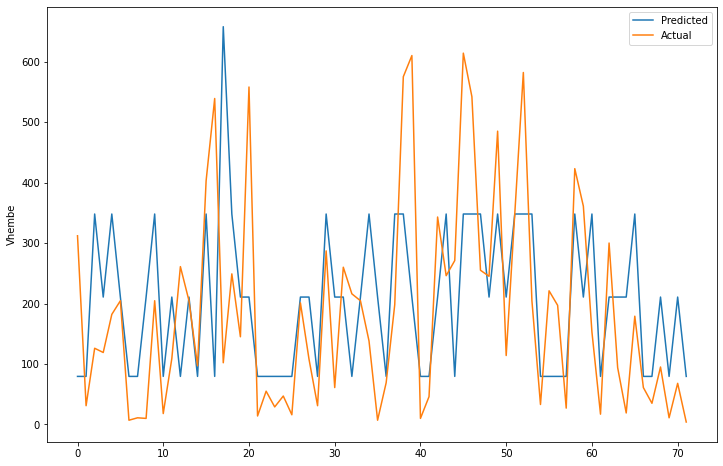

In [47]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(27)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['Gcv ~ Gcv~DecisionTreeRegressor'] = build_model(tree_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

In [48]:
#Function to test Support Vector Machine algorith without GridSearch
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train,y_train)
    
    return model


In [49]:
#Function to train the Model using Suport Vector machine  using Gridsearch and cross validation to get the parameters
def svr_regGcv(x_train, y_train):
    params={'C': [1, 10],'degree':(2,3) ,'kernel': ('linear', 'poly','rbf')}
    model = GridSearchCV(SVR(), params, verbose=1, cv=3)
    model.fit(x_train, y_train)
    
    return model

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Training_score :  0.37675959120738145
Test_score :  0.1508161057117835
r_score :  0.1508161057117835
mean_squared_error :  29272.392022922097
Number of features Selected :  23
Feature Selection Technique :  F Regresion Method


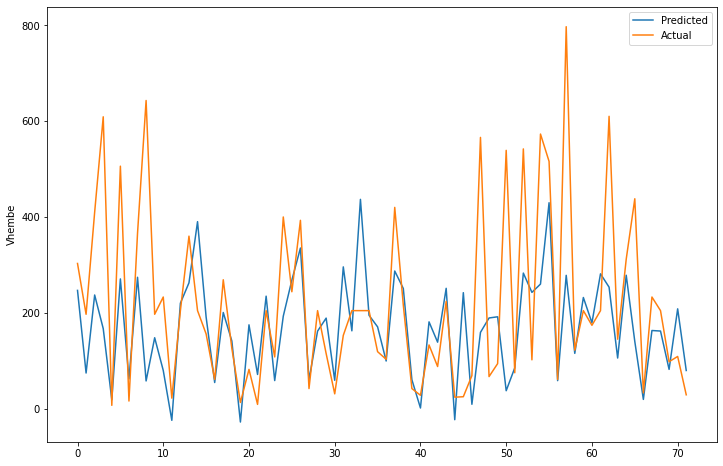

In [50]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(23)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['model ~ Gcv~SVR'] = build_model(svr_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )
                                                

In [96]:
#Averaging Techniques - data training in parallel
#Bagging and pasting involve using the same training algorith on a different subsets of the training data
#r2 is how much of the variance in the underlying data is captured by this model -  most objective measure

#oob_score  = True Perfom out-of-bag evaluation after training - 
#instances that were not used for training will be used for evaluating a predictor


In [97]:
#Averaging Techniques - data training in parallel
### Pasting

#Here we perform sampling without replacement (bootstrap=False), this method is called pasting

In [51]:
#Function to test BaggingRegressor algorith without GridSearch
def pas_reg(x_train, y_train):
    model = BaggingRegressor(DecisionTreeRegressor(), 
                               n_estimators = 500,
                               bootstrap = False,
                               max_samples = 1.0,
                               n_jobs = -1)
    model.fit(x_train, y_train)
    
    return model

In [52]:
#Function to test Pasting BaggingRegressor algorith with GridSearch
def pas_regGcv(x_train, y_train):
    
        param_grid = {
            'n_estimators': [100, 200, 300, 400, 500, 600]
            
        }

        model = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(),
                                              bootstrap = False,
                                              max_samples = 1.0),
                                              param_grid
                                            )
        model.fit(x_train, y_train)
        
        return model

Training_score :  1.0
Test_score :  -0.23382126543328452
r_score :  -0.23382126543328452
mean_squared_error :  30735.832267564754
Number of features Selected :  26
Feature Selection Technique :  F Regresion Method


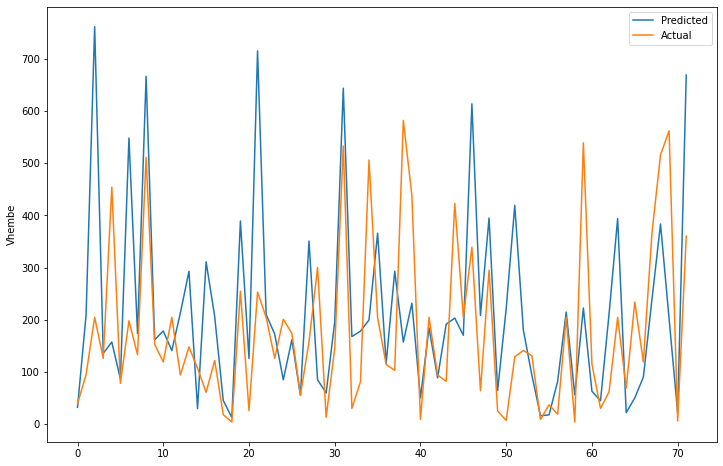

In [53]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(26)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['model ~ Gcv~Pas~BaggingRegressor'] = build_model(pas_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )
                                                

In [ ]:
#Averaging Techniques - data training in parallel

# # ### Bagging
# # - Here we perform sampling with replacement (bootstrap=True), this method is called bagging. 

# # So 63% of the training instances are sampled on average for each predictor. 
# By setting oob_score=True we are doing an automatic evaluation after training 
#using the remaining 37% of the training instance which is not sampled 
# and this data is called out-of-bags(oob).


In [54]:
#Function to test BaggingRegressor algorith without GridSearch

def bag_reg(x_train, y_train):
    model = BaggingRegressor(DecisionTreeRegressor(), 
                               n_estimators = 500,
                               bootstrap = True,
                               max_samples = 1.0,
                               n_jobs = -1)
    model.fit(x_train, y_train)
    
    return model

In [55]:
#Function to test BaggingRegressor algorith with GridSearch

def bag_regGcv(x_train, y_train):
    
        param_grid = {
            'n_estimators': [100, 200, 300, 400, 500]
            
        }

        model = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(),
                                              bootstrap = True,
                                              max_samples = 1.0,
                                              n_jobs = -1),
                                              param_grid
                                            )
        model.fit(x_train, y_train)
        
        return model

Training_score :  0.9073745422275633
Test_score :  0.3327378101060037
r_score :  0.3327378101060037
mean_squared_error :  17285.005192053013
Number of features Selected :  30
Feature Selection Technique :  F Regresion Method


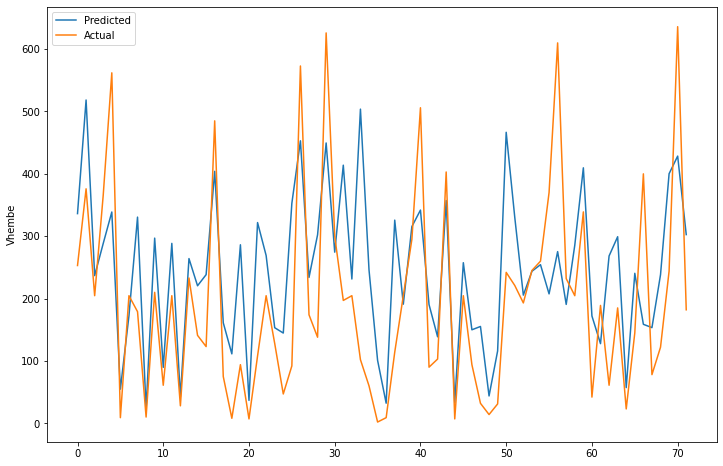

In [56]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(30)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['model ~ Gcv~Bag~BaggingRegressor'] = build_model(bag_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )
                                                

In [57]:
#Function to test RandomForestRegressor algorith without GridSearch
def rnd_reg(x_train, y_train):
    model = RandomForestRegressor(n_estimators=600, max_leaf_nodes=12, n_jobs=-1)
    
    model.fit(x_train, y_train)
    
    return model

In [58]:
#Function to test RandomForestRegressor algorith with GridSearch

def rnd_regGcv(x_train, y_train):
    
        param_grid = {
            'n_estimators': [1, 5, 10, 50, 100, 200, 300, 400, 500, 600]
        }

        model = GridSearchCV(RandomForestRegressor(
                                              bootstrap = True,
                                              max_samples = 1.0,
                                              n_jobs = -1,
                                              max_leaf_nodes=12),
                                              param_grid
                                              )
        model.fit(x_train, y_train)
        
        return model

Training_score :  0.8073369669288771
Test_score :  0.26930710140769376
r_score :  0.26930710140769376
mean_squared_error :  24631.10156809834
Number of features Selected :  30
Feature Selection Technique :  F Regresion Method


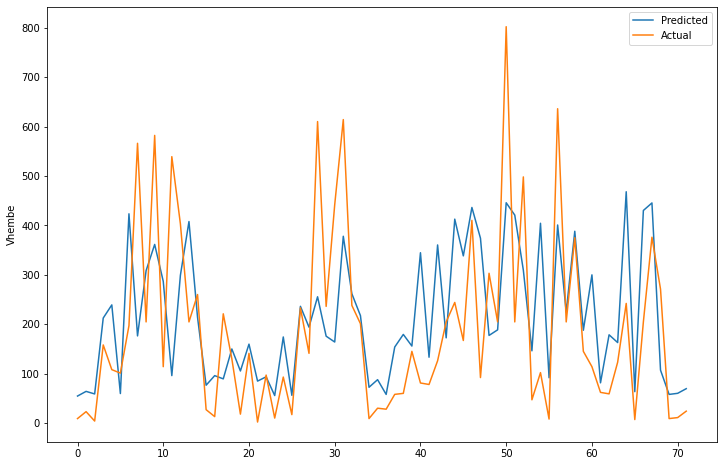

In [59]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(30)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['model ~ Gcv~RandomForestRegressor'] = build_model(rnd_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )
                                                

In [ ]:
# ### ExtraTreesClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html    
# Extra-Tree Regressor is growing tree even more random by using random thresholds for each features rather than searching 
# #for best possible thresholds(like regular decision tree).

In [ ]:
#Function to test ExtraTreesRegressor algorith without GridSearch
def extra_reg(x_train, y_train):
    model = ExtraTreesRegressor(n_estimators = 600,
                                 max_leaf_nodes = 16,
                                 n_jobs = -1)

    model.fit(x_train, y_train)
    
    return model

In [ ]:
#Function to test ExtraTreesRegressor algorith without GridSearch

def extra_regGcv(x_train, y_train):
    
        param_grid = {
            'n_estimators': [1, 5, 10, 50, 100, 200, 300, 400, 500]
        }

        model = GridSearchCV(ExtraTreesRegressor(
                                              bootstrap = True,
                                              max_samples = 1.0,
                                              n_jobs = -1,
                                              max_leaf_nodes=16),
                                              param_grid
                                              )
        model.fit(x_train, y_train)
        
        return model

Training_score :  0.7505041864875055
Test_score :  0.36456232594690685
r_score :  0.36456232594690685
mean_squared_error :  24886.322265283896
Number of features Selected :  30
Feature Selection Technique :  F Regresion Method


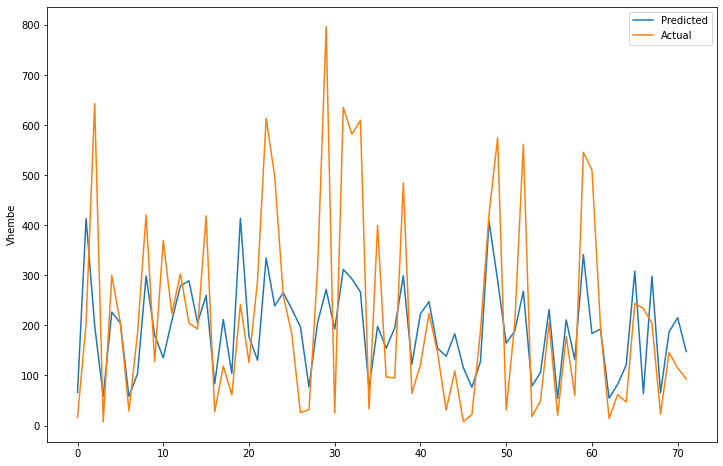

In [ ]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(30)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['model ~ Gcv~ExtraTreesRegressor'] = build_model(extra_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

In [ ]:
#Function to test AdaBoostRegressor algorith without GridSearch
def ada_reg(x_train, y_train):
    model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), 
                            n_estimators=200, 
                            learning_rate=0.5)
    model.fit(x_train, y_train)
    
    return model


In [ ]:
#Function to test AdaBoostRegressor algorith with GridSearch

def ada_regGcv(x_train, y_train):
    
        param_grid = {
            'n_estimators': [100, 200, 300, 400, 500,600],
            'learning_rate':[1.0, 0.5,0.1]
            
        }

        model = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(max_depth=12)),
                                               param_grid
                                              )
        model.fit(x_train, y_train)
        
        return model


Training_score :  0.9993256872147958
Test_score :  0.29261604721572043
r_score :  0.29261604721572043
mean_squared_error :  21153.949235357995
Number of features Selected :  13
Feature Selection Technique :  F Regresion Method


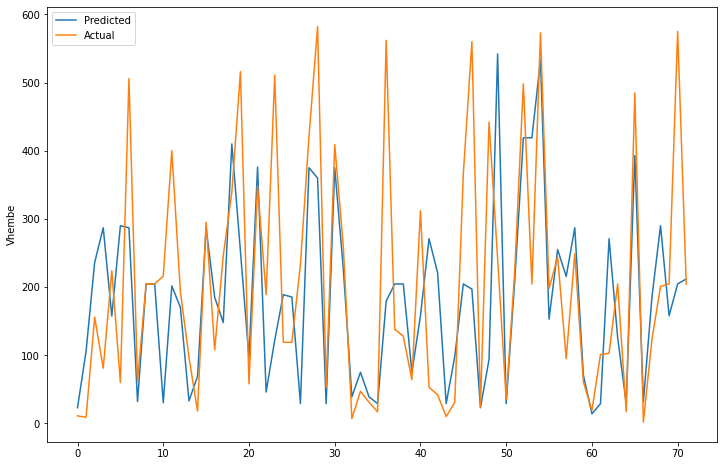

In [ ]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(13)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['model ~ Gcv~AdaBoostRegressor'] = build_model(ada_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

In [ ]:
#Function to test GradientRegressor algorith without GridSearch
def gbr_reg(x_train, y_train):
    
    model = GradientBoostingRegressor(max_depth=3, n_estimators=30, learning_rate=0.1)
    model.fit(x_train, y_train)
    
    return model



In [ ]:

#Function to test GradientRegressor algorith with GridSearch

def gbr_regGcv(x_train, y_train):
    
        param_grid = {
            'n_estimators': [100, 200, 300, 400, 500,600],
            'learning_rate':[1.0, 0.5,0.1]
            
        }

        model = GridSearchCV(GradientBoostingRegressor(max_depth=12),
                                               param_grid
                                              )
        model.fit(x_train, y_train)
        
        return model


Training_score :  1.0
Test_score :  -0.504048086681862
r_score :  -0.504048086681862
mean_squared_error :  35299.781025614204
Number of features Selected :  30
Feature Selection Technique :  F Regresion Method


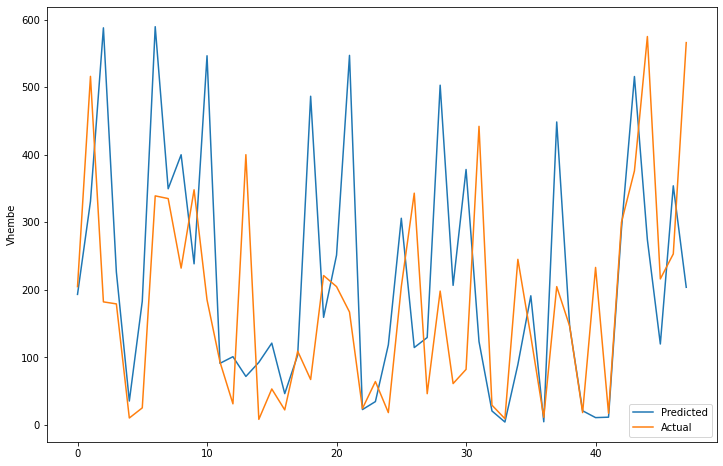

In [ ]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(30)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=True
result_dict['model ~ Gcv~GradientBoostingRegressor'] = build_model(gbr_regGcv,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

In [ ]:
def ensemble_reg(x_train, y_train):
    
    et_reg = ExtraTreesRegressor(n_estimators = 600,max_leaf_nodes = 16,n_jobs = -1)
    rnd_reg = RandomForestRegressor(n_estimators=700)
    ada_reg=AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), n_estimators = 700,learning_rate=0.1)
   
   
    model = VotingRegressor(estimators=
                                 [('et', et_reg), 
                                  ('rnd', rnd_reg), 
                                  ('dtr', ada_reg)])
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7700763338799607
Test_score :  0.23210168188454128
r_score :  0.2321016818845414
mean_squared_error :  16997.846536661702
Number of features Selected :  30
Feature Selection Technique :  F Regresion Method


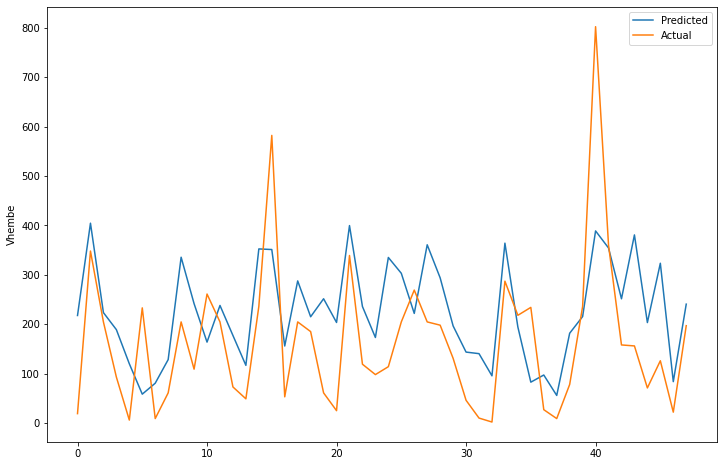

In [ ]:
final_selected_col_df = select_columns(30)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=False
result_dict['model ~ Ensemble'] = build_model(ensemble_reg,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

In [ ]:

#Function to test MLP algorith without GridSearch
def mlp_reg(x_train, y_train):
    model = MLPRegressor(activation = 'relu',
                       hidden_layer_sizes=[10,20,30], 
                       solver='sgd', 
                       verbose=False,
                       max_iter=100000
                    )
    model.fit(x_train, y_train) 
    return model

In [ ]:
final_selected_col_df = select_columns(5)  #30,10,27

FS_Technique = 'F Regresion Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
GridSearch=False
lable = 'Vhembe'
result_dict['model ~ MLPRegressorGCV'] = build_model(mlp_regGcv,
                                                lable,
                                                feature_select,
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [95]:
#Function to train the Model using Multilayer Percepton and using Gridsearch and cross validation to get the parameters
def mlp_regGcv(x_train, y_train):
    
    params = [
    {
     'activation' : ['identity', 'logistic', 'tanh', 'relu'],
     'hidden_layer_sizes': [(30),(10, 30, 20)],
     'solver': ['lbfgs', 'sgd', 'adam','identity'],
     'verbose': [False], 
     'max_iter': [100000]
    }
    ]
    #model = GridSearchCV(MLPRegressor, params, verbose=1, cv=3)
    model = GridSearchCV(MLPRegressor(random_state=42), params, verbose=1, cv=5)
    model.fit(x_train, y_train)
    
    return model


Training_score :  -inf
Test_score :  -inf
r_score :  -inf
mean_squared_error :  inf
Number of features Selected :  28
Feature Selection Technique :  Mutual Information Method


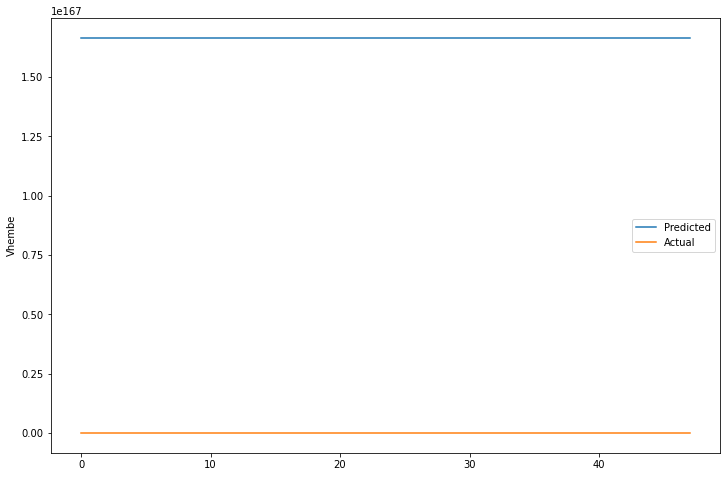

In [ ]:
#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

#code to call the build model which will train the model
#specify the parameters and call the build mode to train the model and store the results in a dictionary (result_dict)

final_selected_col_df = select_columns(28)  #30,10,27

FS_Technique = 'Mutual Information Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=False
result_dict['model ~ Gcv~GradientBoostingRegressor'] = build_model(mlp_reg,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SequentialFeatureSelector


In [86]:
def KNNReg(x_train, y_train):
  model = KNeighborsRegressor(n_neighbors=5)
  #model = SequentialFeatureSelector(knn, n_features_to_select=25,direction='backward')
  model.fit(x_train, y_train)
  return model

Training_score :  0.41141131394059227
Test_score :  0.2728030554156544
r_score :  0.2728030554156544
mean_squared_error :  22586.76864789339
Number of features Selected :  13
Feature Selection Technique :  Mutual Information Method


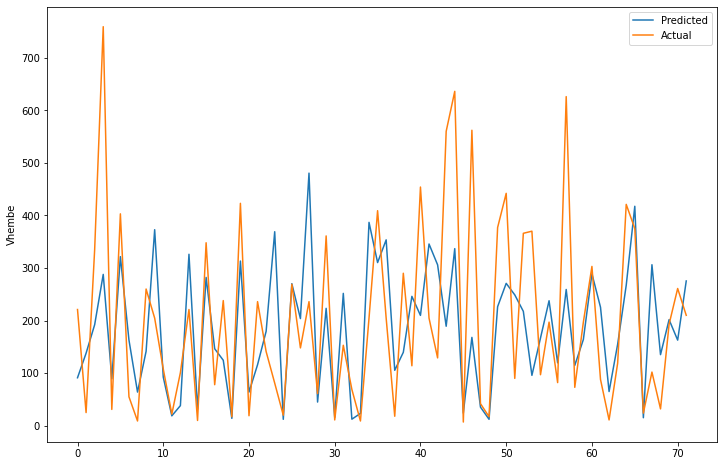

In [94]:
final_selected_col_df = select_columns(13)  #30,10,27

FS_Technique = 'Mutual Information Method' #['Lasso Method', 'F Regresion Method', 'Mutual Information Method']

feature_select = list(malaria_df[final_selected_col_df[FS_Technique].values].columns)
NKbest=len(feature_select)
lable = 'Vhembe'
GridSearch=False
result_dict['model ~ KNeighborsRegressor'] = build_model(KNNReg,
                                                lable,
                                                feature_select,       
                                                NKbest,
                                                FS_Technique,
                                                malaria_df,
                                                GridSearch,
                                                show_plot_Y=True,
                                                preprocess_fn=apply_standard_scaler
                                                
                                                          )

# **Using H20 Amanzon**

In [34]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 10 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_4lten6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.98 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [36]:
h2o.display.toggle_user_tips()

In [37]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Datareadyformodeling.csv to Datareadyformodeling (1).csv


In [38]:
#df = pd.read_csv('train-2years.csv',index_col=0)
df = h2o.import_file('Datareadyformodeling.csv')
df.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


C1,Date,Capricorn,Greater Sekhukhune,Mopani,Vhembe,Waterberg,provincial,dis35AWRI,dis48AWRI,dis49AWRI,dis50AWRI,dis63AWRI,dis64AWRI,dis65AWRI,dis76AWRI,dis77AWRI,dis86AWRI,dis35EDI,dis48EDI,dis49EDI,dis65EDI,dis76EDI,dis35rainfall,dis48rainfall,dis49rainfall,dis50rainfall,dis63rainfall,dis64rainfall,dis65rainfall,dis76rainfall,dis77rainfall,dis86rainfall,TempThabazimi,TemLEPHALALE,TempPOLOKWANE,TempTHOHOYANDOUAWS,humidityTha,humidityLe,humidityPol,humidityThou,TempHOEDSPRUIT,humidityHoe
0,1998-01-31 00:00:00,13,4,88,244,44,393,170.2,287.1,435.1,194.6,285,130.4,148.2,218.7,144.2,292.4,-0.8,-0.24,0.21,-0.5,-0.62,89,125.7,248.8,110.5,71.1,33.5,69.9,74.2,46.7,122.7,22.4955,26.2941,22.8145,24.6676,54.5551,63.448,69.9839,79.629,25.6824,76.25
1,1998-02-28 00:00:00,23,10,135,562,48,778,133.6,236.6,361,148.4,269.1,131.2,114.9,201.7,133.4,257.8,-1.19,-0.66,-0.57,-0.94,-0.89,11.9,30.4,52.1,11.5,56.9,35.4,9.1,41.6,28.7,47.6,24.818,27.0827,22.6467,24.5316,71.7615,55.558,68.564,76.5653,25.5208,75.7515
2,1998-03-31 00:00:00,7,3,109,312,24,455,114.2,201.9,324.6,129.1,219.1,139.2,117,185.2,159.4,237.7,-1.33,-0.97,-0.74,-0.91,-1.27,13.3,24,53.2,17.9,16.3,41.4,30.8,34.2,60.1,46.5,26.6233,27.2371,22.6036,25.0797,57.652,54.2124,65.2836,69.3575,25.6618,71.5484
3,1998-04-30 00:00:00,16,1,49,269,38,373,93.8,184.6,281.7,103.5,200.3,125.7,97.2,154.4,153.5,186,-1.45,-0.99,-0.79,-1.09,-1.48,5.3,28.3,32,3.9,30.1,21,8.2,13,35,5,22.02,23.5775,19.4189,21.4651,56.4429,54.8306,63.9708,74.3208,23.621,70.2694
4,1998-05-31 00:00:00,9,6,22,101,19,157,73.5,142.5,218.8,80.9,154.6,96.2,75.6,119.6,115.9,145.2,-1.49,-1.03,-0.87,-1.15,-1.51,0,0,0.2,0,0.1,0,0,0,0,0,16.2883,18.5366,15.746,18.8352,48.5081,44.1613,46.7473,57.9543,21.1301,56.5269
5,1998-06-30 00:00:00,3,0,12,17,0,32,57.9,112,172.3,63.7,121.1,75.6,59.5,94.2,91,114.7,-1.55,-1.06,-0.94,-1.18,-1.57,0,0.2,0.3,0,0,0,0,0,0,0,12.5907,15.3581,13.1685,16.5683,52.335,49.6944,50.2875,60.6069,18.7817,59.1903
6,1998-07-31 00:00:00,0,1,6,9,1,17,49.4,110.8,173.7,54.8,93.6,59.1,46.3,73.4,71.5,89.5,-1.56,-0.8,-0.63,-1.15,-1.54,4.5,23.9,39.8,5.5,0,0,0,0,0,0,13.6263,15.3958,12.9397,16.1515,53.3132,54.1129,58.6626,68.6922,17.7448,68.0954
7,1998-08-31 00:00:00,1,0,5,39,9,54,39.2,86.5,139.5,44.2,70.9,45.3,35.1,56.3,55.4,68.5,-1.6,-0.88,-0.71,-1.23,-1.67,2.4,4.8,10.8,3.5,0.8,0.1,0,0.7,0,0.6,16.2083,17.3426,14.2211,17.4195,47.1855,49.1263,52.6035,63.6761,19.0921,64.8938
8,1998-09-30 00:00:00,3,0,49,141,13,206,42.3,79.6,141.8,41.3,83.3,37.8,28.9,50,47.3,82.1,-1.52,-0.83,-0.54,-1.27,-1.46,14.3,17.1,40.3,9.9,33.1,4.5,3.6,9.5,5.8,32.7,22.4671,21.9817,17.8019,19.8042,43.5153,45.7111,54.8569,63.6778,21.3775,64.5986
9,1998-10-31 00:00:00,5,0,45,221,4,275,106.6,132.7,212.1,72,140.8,64.2,38.3,76.4,67,114.6,0.06,-0.42,0.32,-1.33,-1.33,77.7,77.3,112.2,43.6,85.6,38.3,18.7,43,33.5,59.3,24.0625,23.5652,19.22,20.0546,54.5551,58.1788,67.0927,80.5605,21.8766,74.0363


In [39]:
splits = df.split_frame(ratios=[0.75],seed=1)
train = splits[0]
test = splits[1]

In [40]:
test

C1,Date,Capricorn,Greater Sekhukhune,Mopani,Vhembe,Waterberg,provincial,dis35AWRI,dis48AWRI,dis49AWRI,dis50AWRI,dis63AWRI,dis64AWRI,dis65AWRI,dis76AWRI,dis77AWRI,dis86AWRI,dis35EDI,dis48EDI,dis49EDI,dis65EDI,dis76EDI,dis35rainfall,dis48rainfall,dis49rainfall,dis50rainfall,dis63rainfall,dis64rainfall,dis65rainfall,dis76rainfall,dis77rainfall,dis86rainfall,TempThabazimi,TemLEPHALALE,TempPOLOKWANE,TempTHOHOYANDOUAWS,humidityTha,humidityLe,humidityPol,humidityThou,TempHOEDSPRUIT,humidityHoe
2,1998-03-31 00:00:00,7,3,109,312,24,455,114.2,201.9,324.6,129.1,219.1,139.2,117,185.2,159.4,237.7,-1.33,-0.97,-0.74,-0.91,-1.27,13.3,24,53.2,17.9,16.3,41.4,30.8,34.2,60.1,46.5,26.6233,27.2371,22.6036,25.0797,57.652,54.2124,65.2836,69.3575,25.6618,71.5484
6,1998-07-31 00:00:00,0,1,6,9,1,17,49.4,110.8,173.7,54.8,93.6,59.1,46.3,73.4,71.5,89.5,-1.56,-0.8,-0.63,-1.15,-1.54,4.5,23.9,39.8,5.5,0,0,0,0,0,0,13.6263,15.3958,12.9397,16.1515,53.3132,54.1129,58.6626,68.6922,17.7448,68.0954
9,1998-10-31 00:00:00,5,0,45,221,4,275,106.6,132.7,212.1,72,140.8,64.2,38.3,76.4,67,114.6,0.06,-0.42,0.32,-1.33,-1.33,77.7,77.3,112.2,43.6,85.6,38.3,18.7,43,33.5,59.3,24.0625,23.5652,19.22,20.0546,54.5551,58.1788,67.0927,80.5605,21.8766,74.0363
12,1999-01-31 00:00:00,58,0,314,376,53,801,295.6,425.9,542.3,240.5,318.2,208.3,198,263.8,228.7,317.8,0.71,1.03,0.95,0.25,0.08,130.1,189.2,213.1,83.3,93.7,89.4,75.5,87.5,37.6,75.7,22.4955,25.147,21.225,24.2981,54.5551,70.5161,76.4691,82.2016,24.7485,83.9852
20,1999-09-30 00:00:00,19,28,181,335,5,568,110,115.3,206.2,66.9,94.3,39.2,49.5,62.5,50.7,77.7,0.49,-0.1,0.51,-0.51,-1.01,7.8,5.5,12.9,4.7,19.8,1.2,10.7,3.6,1.8,7.5,20.529,20.2254,16.5785,19.6276,42.7057,44.8185,51.7347,51.6447,20.4918,55.7014
37,2001-02-28 00:00:00,14,0,206,516,8,744,261.5,380.4,592.4,207.2,259.3,173.2,171.6,240.9,146.5,271.7,0.06,0.29,0.61,-0.08,-0.28,173.2,225.4,391.4,117.2,68.2,71.6,88.6,115.4,82.2,130.8,24.4735,24.6435,20.5509,22.5326,74.378,75.0312,73.0074,77.872,23.685,74.5938
39,2001-04-30 00:00:00,8,0,144,360,18,530,234.7,270.4,491.4,184.8,188.9,156.6,151.9,174.8,116.2,204.7,0.21,-0.21,0.69,0.06,-0.94,29,19.3,73.5,30.2,18.4,29.7,26.8,26.9,18.7,38.1,21.8846,21.0149,17.9035,20.6186,79.0914,77.9222,75.4986,76.5444,22.1933,74.2639
51,2002-04-30 00:00:00,3,2,78,419,7,509,153.9,220.7,291.8,108,297.7,151.5,109,233.8,180.5,179.9,-0.71,-0.7,-0.69,-0.89,0.05,22.3,43.2,28.8,10.3,33.5,28,26.2,62.5,66.1,27.5,20.9394,22.6454,19.2494,21.0928,56.273,53.8467,63.7361,67.0806,22.9297,64.8556
53,2002-06-30 00:00:00,1,0,6,61,6,74,115.5,145.9,229,78.3,191.9,114.9,76.1,154.7,122.7,125.5,-0.52,-0.65,-0.37,-0.75,0.1,17.9,9,46.3,9.4,6.2,16.5,6,6.9,8.8,1.9,12.3442,14.3817,12.0933,15.5506,58.3486,53.8467,63.7914,65.5292,17.3289,60.1444
55,2002-08-31 00:00:00,0,0,24,10,5,39,71.5,88,145.5,46.8,137.3,66.5,44.7,91.9,73.6,95.4,-0.62,-0.79,-0.52,-0.86,-0.19,3.3,1.9,12.4,1.6,19.5,0.1,0.2,0.7,0.8,22.1,18.1007,19.2263,15.588,18.4603,46.2755,53.8467,61.4194,63.3185,20.0176,59.6532


In [65]:
y_test= test['Vhembe']
y_test

Vhembe
312
9
221
376
335
516
360
419
61
10


In [66]:
y = "Vhembe" 
x = df.columns 
x.remove(y) 
x.remove("Capricorn")
x.remove("Greater Sekhukhune")
x.remove("Mopani")
x.remove("Waterberg")

In [1]:
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=x,y=y, training_frame=train)

NameError: ignored

In [68]:
lb = aml.leaderboard
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_grid_1_AutoML_2_20230206_135400_model_13,72.1113,5200.05,40.8209,0.308966,5200.05
XGBoost_grid_1_AutoML_2_20230206_135400_model_8,72.7257,5289.02,41.7538,0.275848,5289.02
StackedEnsemble_BestOfFamily_4_AutoML_2_20230206_135400,76.8557,5906.79,40.7722,nan,5906.79
XGBoost_grid_1_AutoML_2_20230206_135400_model_23,79.2548,6281.32,45.5614,0.429232,6281.32
XGBoost_grid_1_AutoML_2_20230206_135400_model_36,79.7463,6359.46,44.8598,0.283368,6359.46
DeepLearning_grid_1_AutoML_2_20230206_135400_model_1,85.5203,7313.72,55.413,nan,7313.72
StackedEnsemble_AllModels_4_AutoML_2_20230206_135400,99.7925,9958.54,57.342,0.666862,9958.54
XGBoost_grid_1_AutoML_2_20230206_135400_model_34,100.967,10194.4,57.8122,0.442031,10194.4
StackedEnsemble_AllModels_3_AutoML_2_20230206_135400,101.696,10342.1,57.3486,0.659336,10342.1
XGBoost_grid_1_AutoML_2_20230206_135400_model_16,102.618,10530.4,57.4174,nan,10530.4


In [69]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


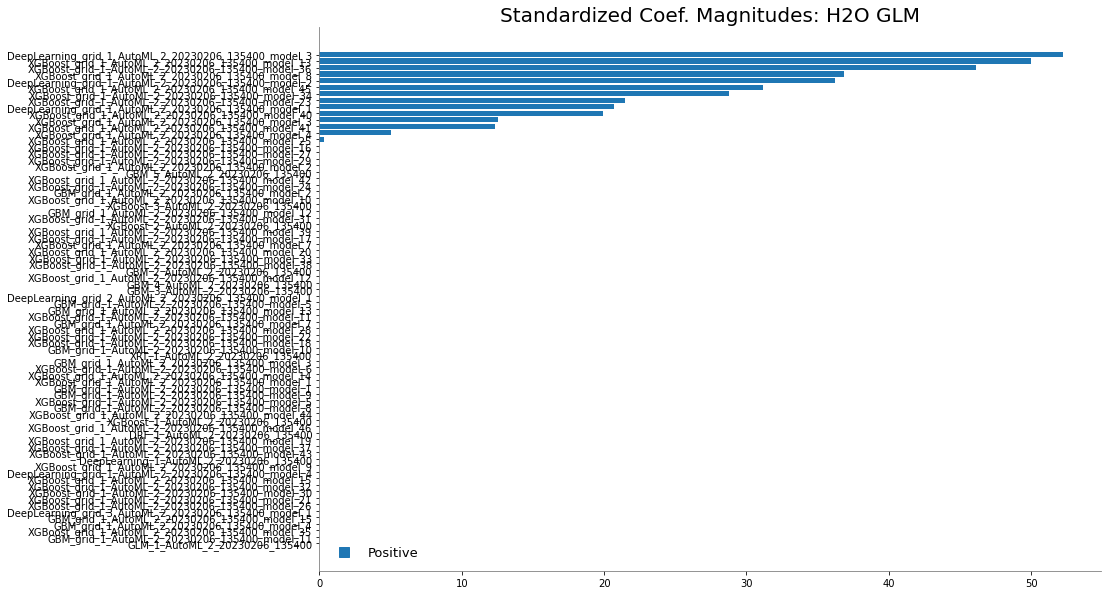

In [70]:
%matplotlib inline
metalearner.std_coef_plot()

In [71]:
leader_model = aml.leader
y_pred = leader_model.predict(test)


xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [21]:
!pip install pandas h2o matplotlib scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [73]:
df_results = pd.DataFrame()
df_results['ground_truth'] = h2o.as_list(test['Vhembe'],use_pandas=True)
df_results['predictions'] = h2o.as_list(y_pred,use_pandas=True)
df_results.head()
 

,ground_truth,predictions
0,312,336.764618
1,9,17.464989
2,221,173.248413
3,376,489.461212
4,335,351.852905


In [88]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2_score : ",r2_score(df_results['ground_truth'],df_results['predictions']))
print("mean_squared_error : ", mean_squared_error(df_results['ground_truth'],df_results['predictions']))

r2_score :  0.7361373042383934
mean_squared_error :  17580.88923862502


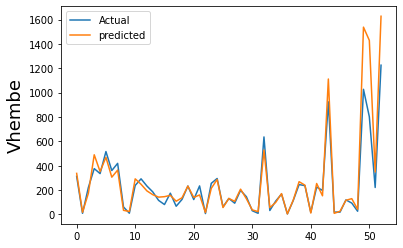

In [91]:
plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions'])
plt.ylabel('Vhembe',fontsize=18)
plt.legend(['Actual','predicted'])
plt.show()